In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.fft import rfft,fft, ifft, fftshift, fftfreq
from PlotOpti import plot_optimization_results

In [2]:
data_path = 'Plot/resultats_multi_dt_lin2025-06-07 17:38:40.090724.npz'
data = np.load(data_path, allow_pickle=True)

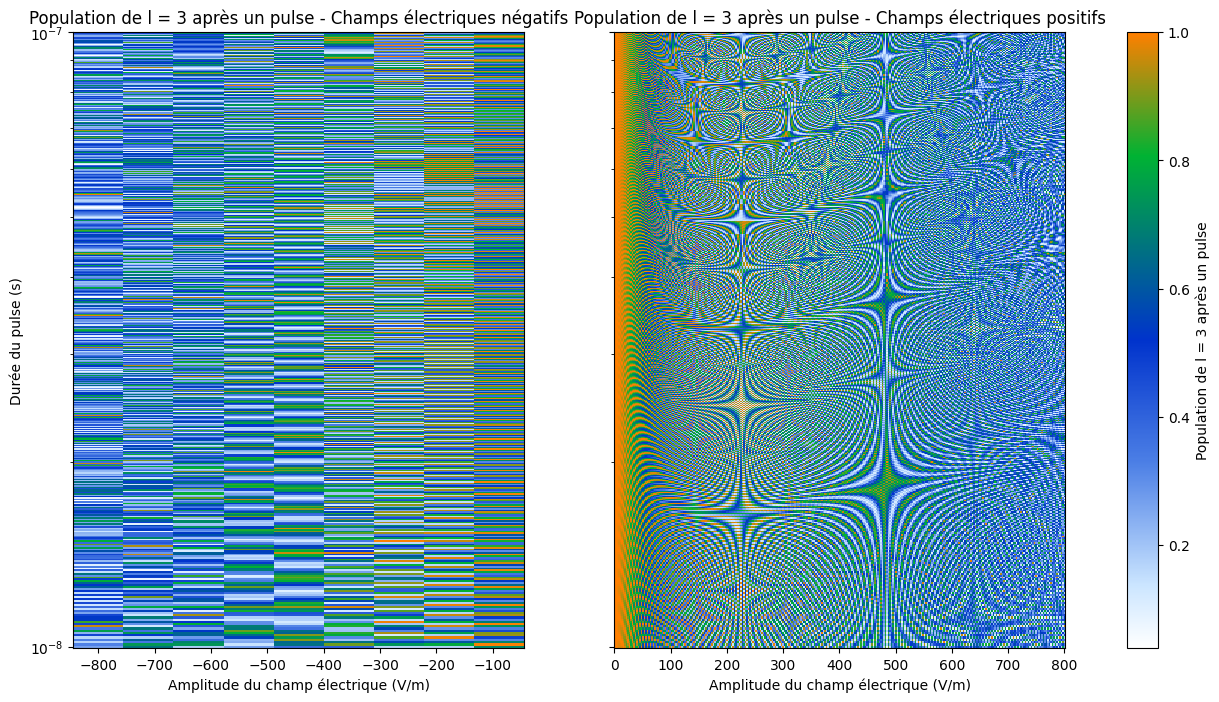


Analyse statistique des populations:
Population de l = 3 après un pulse moyenne: 0.540
Population de l = 3 après un pulse maximale: 1.000

Paramètres optimaux pour la Population de l = 3 après un pulse maximale:
  - Durée: 1.14e-08 s
  - Champ électrique: -0.00 V/m
  - Population de l = 3 après un pulse: 1.000


(<Figure size 1600x800 with 3 Axes>,
 (<Axes: title={'center': 'Population de l = 3 après un pulse - Champs électriques négatifs'}, xlabel='Amplitude du champ électrique (V/m)', ylabel='Durée du pulse (s)'>,
  <Axes: title={'center': 'Population de l = 3 après un pulse - Champs électriques positifs'}, xlabel='Amplitude du champ électrique (V/m)'>))

In [8]:

#print(data['dt_values'])
dt_values = data['dt_values']
#print('dt',type(dt_values))
amplitudes = data['amplitudes']
#l_sup_10_pop = data['l_sup_10_pop'].item()
#l0_pop = data['l10_pop'].item()
#l11_pop = data['l11_pop'].item()
#l3_pop = data['l3_pop'].item()
#l15_pop = data['l15_pop'].item()
l3_pop = data['l3_pop']
plot_optimization_results(data_path, 'l3_pop',title_prefix='Population de l = 3 après un pulse')


In [4]:
period = 0
vitesse_angulaire = -2.748595637603823889e+03
period = 2 * np.pi / vitesse_angulaire

In [12]:
EF_idx = 0
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l3_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
for i in range(40):
    plt.axvline(i*period*1e-8+1e-9, color='r', linestyle='--',alpha=0.1)
plt.xlabel('temps (s)')
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = fft(pop)

RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(POP))
plt.ylabel("partie reelle")
#plt.xlim(0,50)
plt.subplot(212)
plt.plot(np.imag(POP))
plt.ylabel("partie imaginaire")
#plt.xlim(0,50)
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

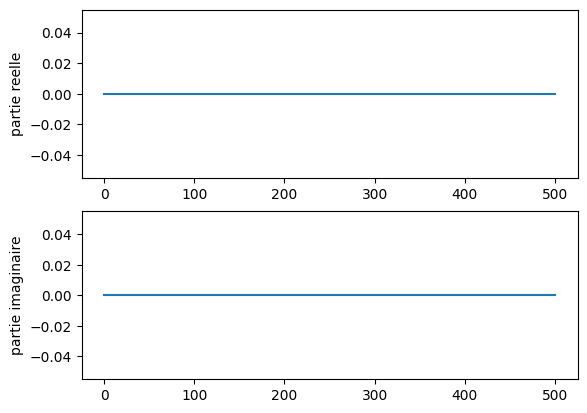

In [7]:
RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(RPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(RPOP))
plt.ylabel("partie imaginaire")

plt.show()

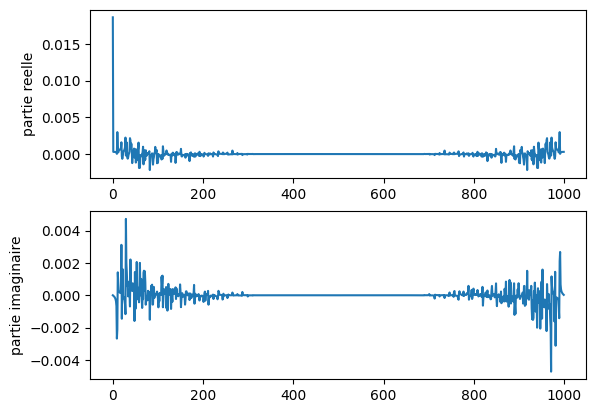

In [7]:
IPOP = ifft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(IPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(IPOP))
plt.ylabel("partie imaginaire")
plt.show()

NpzFile 'Plot/resultats_multi_dt_lin2025-05-22 13:49:49.941198.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...
len= 1000
[ 2.94170980e-01+2.53835893e-02j  2.93552999e-01+5.23721750e-02j
  2.92302118e-01+8.29660793e-02j  2.90014736e-01+1.20218327e-01j
  2.85865157e-01+1.69466431e-01j  2.78122213e-01+2.42160739e-01j
  2.62725383e-01+3.68475085e-01j  2.26491920e-01+6.66763372e-01j
  2.41925160e-02+2.67439718e+00j  2.98462794e+00+2.10715708e+00j
  1.15773687e+00-1.41612744e+00j  2.15963794e-01-7.78979178e-01j
  5.66296533e-01-3.01259754e-01j  5.61374153e-01-2.27285930e-01j
  5.79501005e-01-1.81439841e-01j  6.21195539e-01-1.51945839e-01j
  6.98783373e-01-1.37976483e-01j  8.35385997e-01-1.57278693e-01j
  1.59656297e+00-3.11541915e+00j -3.10375480e-01+1.44852683e+00j
 -6.56714392e-01-1.03460113e+00j -3.11728888e-01-1.60531142e+00j
  2.08605435e-01+1.82136239e-01j  3.89426864e-01+9.93000550e-02j
  5.00912721e-01+1.98134332e-01j  6.49101662e-01+3.25920754e-01j
  9.21093374e-01+

/Users/sam/.pyenv/versions/pymem/lib/python3.13/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/sam/.pyenv/versions/pymem/lib/python3.13/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


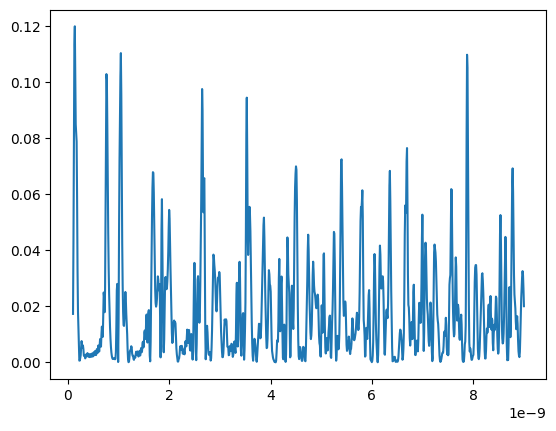

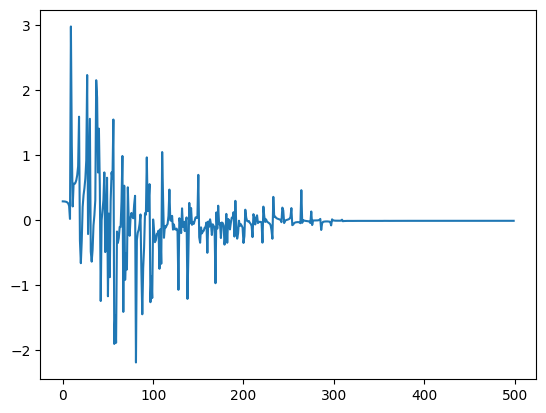

In [8]:
EF_idx = 0
l3_pop = data['l3_pop'].item()
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l15_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = rfft(pop)
POP = POP[1:]
print(POP)
print('len=',len(pop)/2)
plt.figure()
plt.plot(POP)
plt.show()


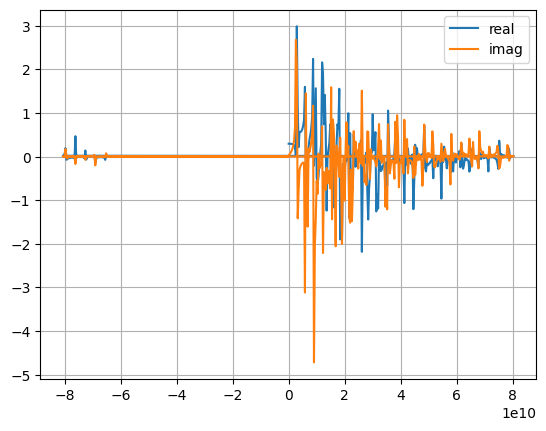

In [9]:
dt_signal = 0.062e-10
n = len(POP)
FREQ_POP = fftfreq(n,dt_signal)
plt.plot(FREQ_POP,POP.real, label = "real")
plt.plot(FREQ_POP,POP.imag, label = "imag")
plt.legend()
plt.grid()
#plt.xlim(-4,4)
plt.show()

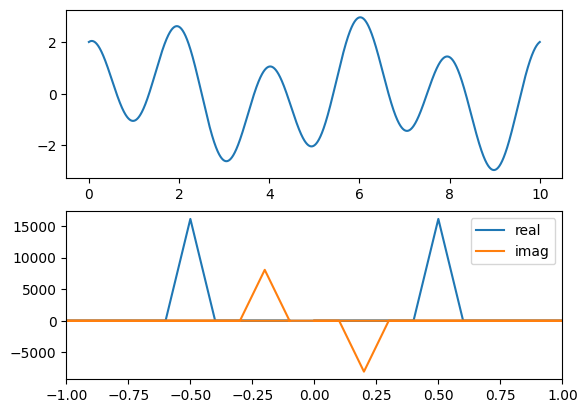

In [10]:
# definition du signal
dt = 0.62e-3
T1 = 2
T2 = 5
t = np.arange(0, T1*T2, dt)
signal = 2*np.cos(2*np.pi/T1*t) + np.sin(2*np.pi/T2*t)

# affichage du signal
plt.subplot(211)
plt.plot(t,signal)

# calcul de la transformee de Fourier et des frequences
fourier = np.fft.fft(signal)
n = signal.size
freq = np.fft.fftfreq(n, d=dt)

# affichage de la transformee de Fourier
plt.subplot(212)
plt.plot(freq, fourier.real, label="real")
plt.plot(freq, fourier.imag, label="imag")
plt.legend()
plt.xlim(-1,1)

plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import minimize

# Supposons que nous avons un signal résultant d'une convolution
# Dans un cas réel, ce serait votre signal mesuré
def generate_example_data(n=100):
    # Créons deux signaux de test
    t = np.linspace(0, 1, n)
    signal1 = np.sin(2 * np.pi * 5 * t)  # Signal sinusoïdal
    signal2 = np.exp(-10 * (t - 0.5)**2)  # Gaussienne
    
    # Leur convolution
    convolved_signal = np.convolve(signal1, signal2, mode='same')
    
    return signal1, signal2, convolved_signal, t

# Fonction objectif pour l'optimisation
def objective_function(params, observed_signal, n):
    # Reconstruction des deux signaux à partir des paramètres
    half_n = len(params) // 2
    signal1_est = params[:half_n]
    signal2_est = params[half_n:]
    
    # Calculer la convolution des signaux estimés
    conv_est = np.convolve(signal1_est, signal2_est, mode='same')
    
    # Erreur quadratique moyenne
    error = np.sum((conv_est - observed_signal)**2)
    
    return error

# Fonction pour décomposer un signal en deux par optimisation
def blind_deconvolution(observed_signal, n_iter=1000):
    n = len(observed_signal)
    
    # Initialisation aléatoire des signaux
    np.random.seed(42)  # Pour la reproductibilité
    initial_guess = np.random.rand(2 * n)
    
    # Optimisation
    result = minimize(
        objective_function, 
        initial_guess, 
        args=(observed_signal, n),
        method='L-BFGS-B', 
        options={'maxiter': n_iter}
    )
    
    # Récupération des signaux estimés
    half_n = len(result.x) // 2
    signal1_est = result.x[:half_n]
    signal2_est = result.x[half_n:]
    
    return signal1_est, signal2_est

/Users/sam/.pyenv/versions/pymem/lib/python3.13/site-packages/scipy/optimize/_numdiff.py:615: ComplexWarning: Casting complex values to real discards the imaginary part
  J_transposed[i] = df / dx
/Users/sam/.pyenv/versions/pymem/lib/python3.13/site-packages/scipy/optimize/_lbfgsb_py.py:398: ComplexWarning: Casting complex values to real discards the imaginary part
  _lbfgsb.setulb(m, x, low_bnd, upper_bnd, nbd, f, g, factr,


signal1_est [ 0.00388588  0.34667482  0.21769447  0.19551551 -0.15991038 -0.13622248
 -0.25610426  0.51247105  0.18437432  0.34862653 -0.13541142  0.37666895
  0.28585034 -0.26351879 -0.16733997 -0.11884741  0.1029345   0.19434817
  0.26669733 -0.04504627  0.30824589 -0.01377909 -0.31484205  0.00563559
  0.27972356  0.25045187 -0.2791659   0.15458982  0.33812338 -0.10436969
  0.02264077 -0.00977009 -0.16444114  0.26737963  0.38718385  0.41344137
  0.01348143 -0.19035654  0.32806405  0.21766208 -0.21703033  0.01917613
 -0.19133076  0.57932999  0.0577474   0.08160847  0.18055472  0.2643882
  0.11148763 -0.12048572  0.48288449  0.4496981   0.65928061  0.45538769
  0.3221861   0.46496038 -0.13104646 -0.12199984 -0.42430596 -0.10329801
 -0.05631122  0.14315683  0.46291953 -0.06439852 -0.06410337 -0.02552186
 -0.0935609   0.26402847 -0.00325556  0.70663505  0.42640066 -0.07434456
 -0.11691246  0.22261595  0.47526362  0.20832116  0.3706455   0.05183261
  0.05271301 -0.07989496  0.44682024  0.

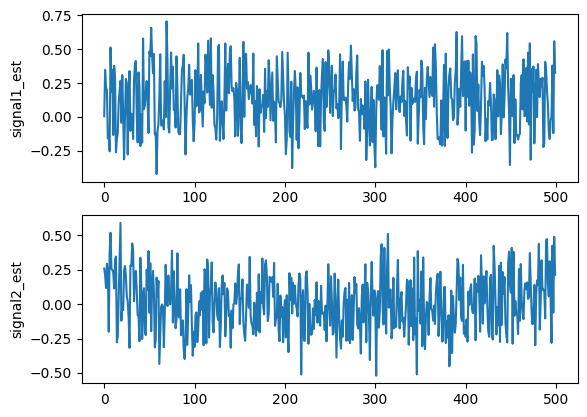

In [15]:
signal1_est, signal2_est = blind_deconvolution(POP, n_iter=1000)
print('signal1_est',signal1_est)
plt.subplot(211)
plt.plot(signal1_est)
plt.ylabel("signal1_est")
plt.subplot(212)
plt.plot(signal2_est)
plt.ylabel("signal2_est")
plt.show()



In [16]:
import scipy.signal as sg
sg.deconvolve(POP,)

TypeError: deconvolve() missing 1 required positional argument: 'divisor'

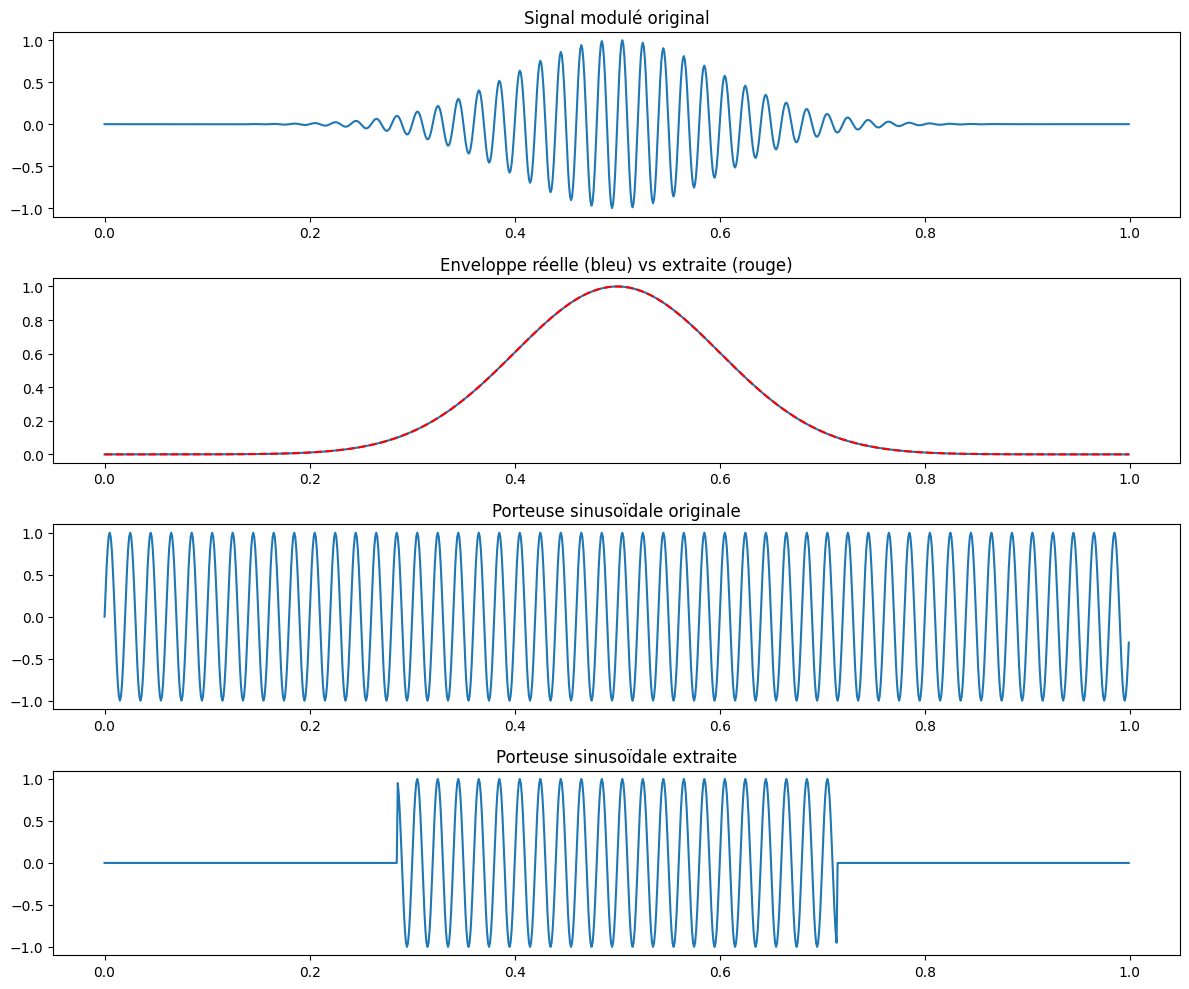

In [17]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Création d'un signal d'exemple: sinusoïde modulée en amplitude
fs = 1000  # Fréquence d'échantillonnage
t = np.arange(0, 1, 1/fs)  # Vecteur temps de 1 seconde

# Fonction d'amplitude (enveloppe) - par exemple une gaussienne
amplitude = np.exp(-(t-0.5)**2/(2*0.1**2))

# Sinusoïde porteuse
freq_porteuse = 50  # Hz
porteuse = np.sin(2*np.pi*freq_porteuse*t)

# Signal modulé en amplitude
signal_module = amplitude * porteuse

# Extraction de l'enveloppe avec la transformée de Hilbert
signal_analytique = signal.hilbert(signal_module)
enveloppe_extraite = np.abs(signal_analytique)

# Extraction de la porteuse
porteuse_extraite = signal_module / enveloppe_extraite
# Correction pour éviter les divisions par zéro
porteuse_extraite[enveloppe_extraite < 0.1] = 0

# Visualisation
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(t, signal_module)
plt.title('Signal modulé original')

plt.subplot(4, 1, 2)
plt.plot(t, amplitude)
plt.plot(t, enveloppe_extraite, 'r--')
plt.title('Enveloppe réelle (bleu) vs extraite (rouge)')

plt.subplot(4, 1, 3)
plt.plot(t, porteuse)
plt.title('Porteuse sinusoïdale originale')

plt.subplot(4, 1, 4)
plt.plot(t, porteuse_extraite)
plt.title('Porteuse sinusoïdale extraite')

plt.tight_layout()
plt.show()

In [18]:
print(POP)

[ 2.94170980e-01+2.53835893e-02j  2.93552999e-01+5.23721750e-02j
  2.92302118e-01+8.29660793e-02j  2.90014736e-01+1.20218327e-01j
  2.85865157e-01+1.69466431e-01j  2.78122213e-01+2.42160739e-01j
  2.62725383e-01+3.68475085e-01j  2.26491920e-01+6.66763372e-01j
  2.41925160e-02+2.67439718e+00j  2.98462794e+00+2.10715708e+00j
  1.15773687e+00-1.41612744e+00j  2.15963794e-01-7.78979178e-01j
  5.66296533e-01-3.01259754e-01j  5.61374153e-01-2.27285930e-01j
  5.79501005e-01-1.81439841e-01j  6.21195539e-01-1.51945839e-01j
  6.98783373e-01-1.37976483e-01j  8.35385997e-01-1.57278693e-01j
  1.59656297e+00-3.11541915e+00j -3.10375480e-01+1.44852683e+00j
 -6.56714392e-01-1.03460113e+00j -3.11728888e-01-1.60531142e+00j
  2.08605435e-01+1.82136239e-01j  3.89426864e-01+9.93000550e-02j
  5.00912721e-01+1.98134332e-01j  6.49101662e-01+3.25920754e-01j
  9.21093374e-01+5.60222320e-01j  2.23773544e+00+1.16435342e+00j
 -2.08737668e-01-4.71555632e+00j  6.44241722e-01-2.01358308e+00j
  1.56424013e+00-1.413750

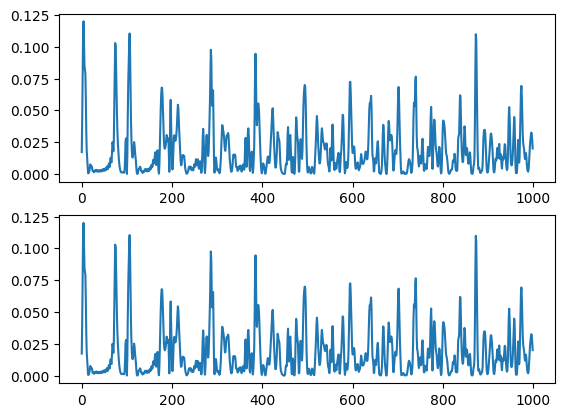

In [19]:
from scipy import signal
signaL = signal.hilbert(pop)
plt.figure()
plt.subplot(211)
plt.plot(signaL)
plt.subplot(212)
plt.plot(pop)
plt.show()

In [20]:
# Filtrage passe-bande pour isoler la porteuse
sos = signal.butter(4, [freq_porteuse-10, freq_porteuse+10], 'bandpass', fs=fs, output='sos')
signal_filtre = signal.sosfilt(sos, pop)

# Détection d'enveloppe simple
enveloppe = np.abs(signal.hilbert(signal_filtre))

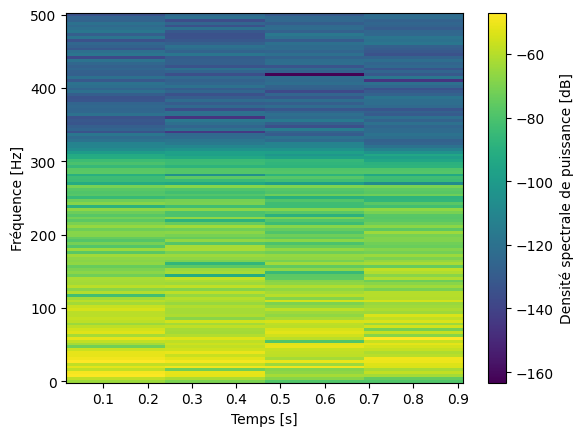

In [21]:
# Analyse par spectrogramme
f, t_spec, Sxx = signal.spectrogram(pop, fs)
plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx))
plt.ylabel('Fréquence [Hz]')
plt.xlabel('Temps [s]')
plt.colorbar(label='Densité spectrale de puissance [dB]')